In [3]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np

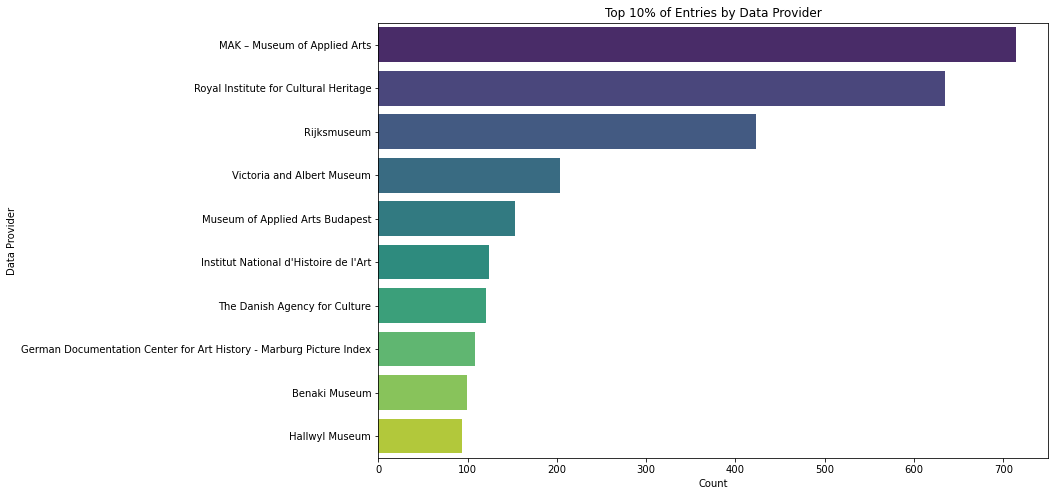

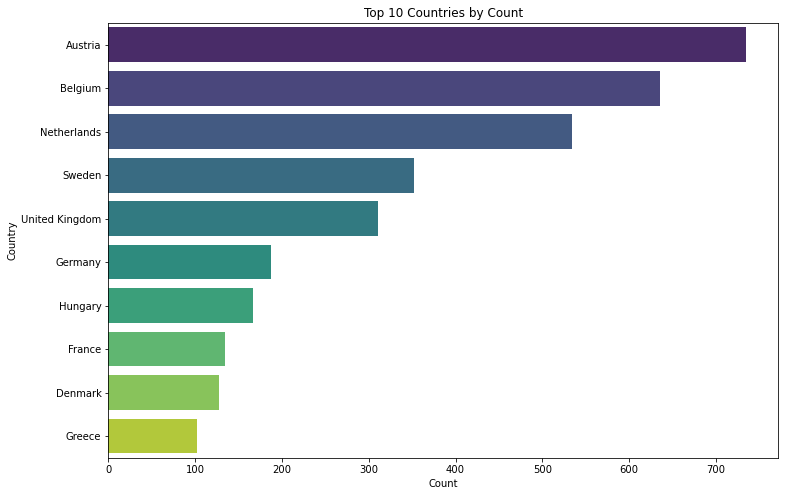

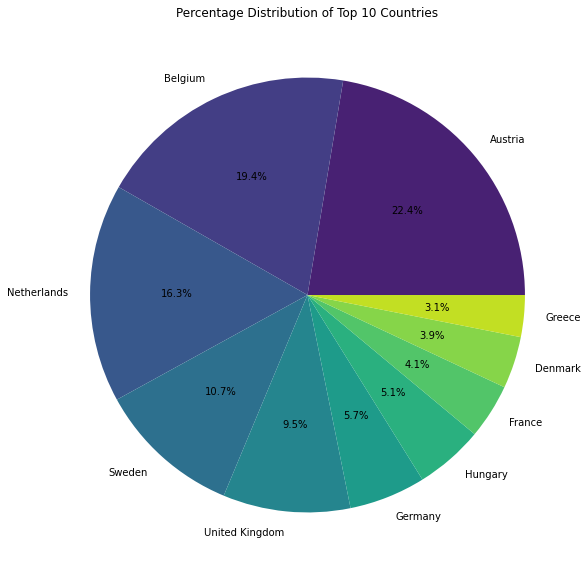

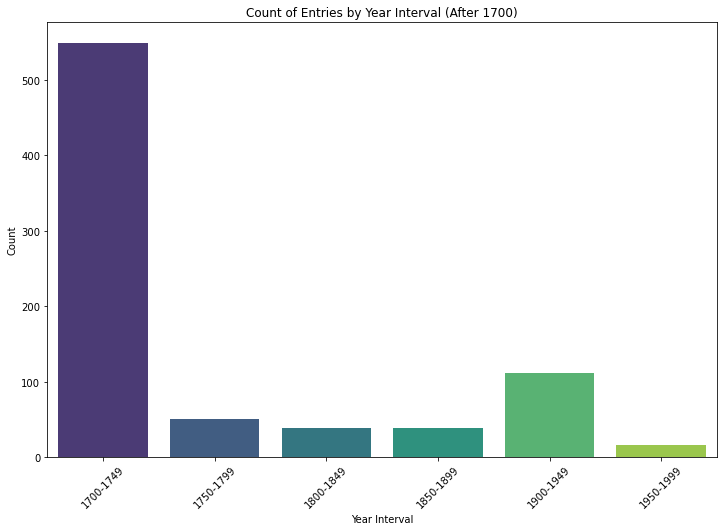

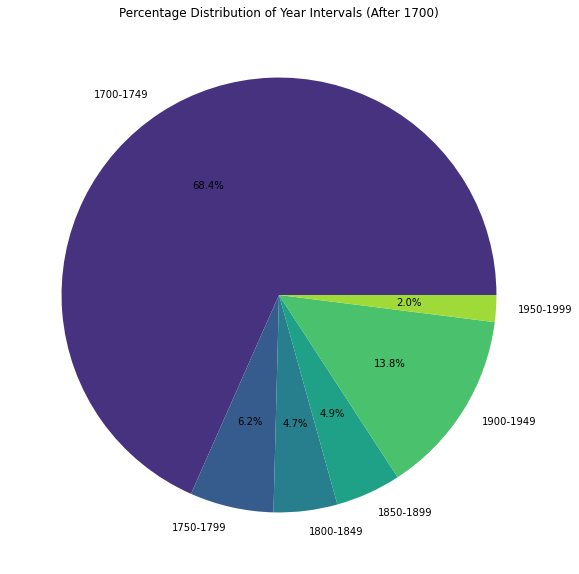

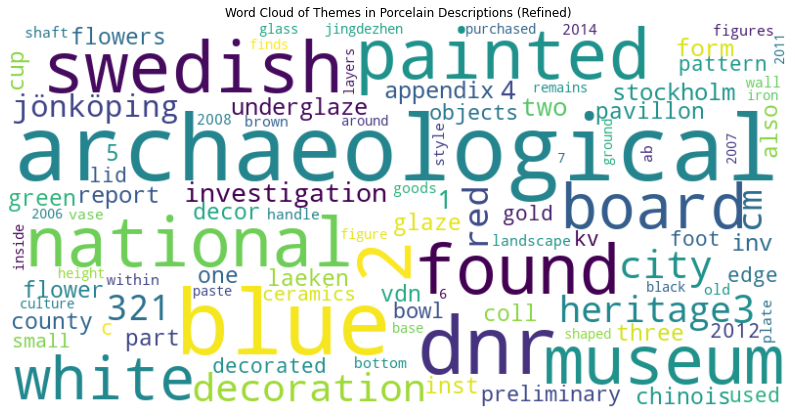

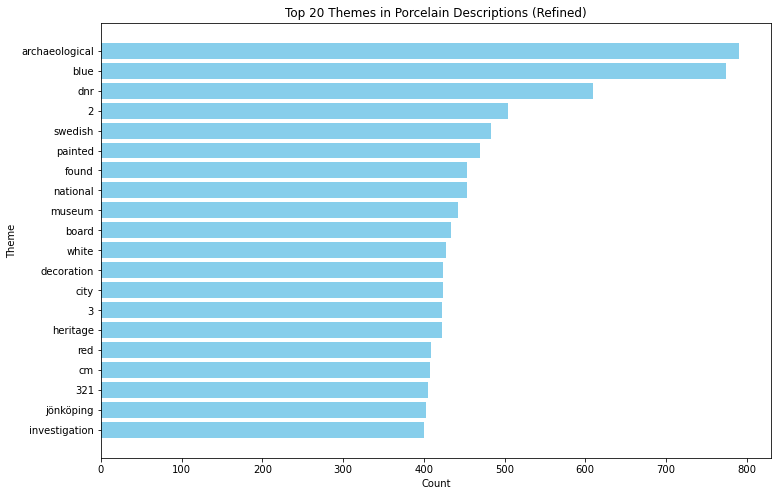

Top 50 words and their counts:
archaeological: 790
blue: 774
dnr: 610
2: 504
swedish: 483
painted: 469
found: 454
national: 453
museum: 442
board: 434
white: 427
decoration: 424
city: 424
3: 423
heritage: 422
red: 409
cm: 408
321: 405
jönköping: 403
investigation: 400
4: 396
1: 383
two: 360
form: 342
appendix: 311
stockholm: 304
underglaze: 292
report: 288
inv: 286
inst: 273
coll: 273
one: 272
cup: 262
green: 261
flowers: 252
county: 243
flower: 238
glaze: 229
decor: 226
laeken: 223
pavillon: 222
chinois: 222
part: 221
vdn: 221
5: 221
also: 220
three: 218
preliminary: 217
objects: 208
bowl: 207


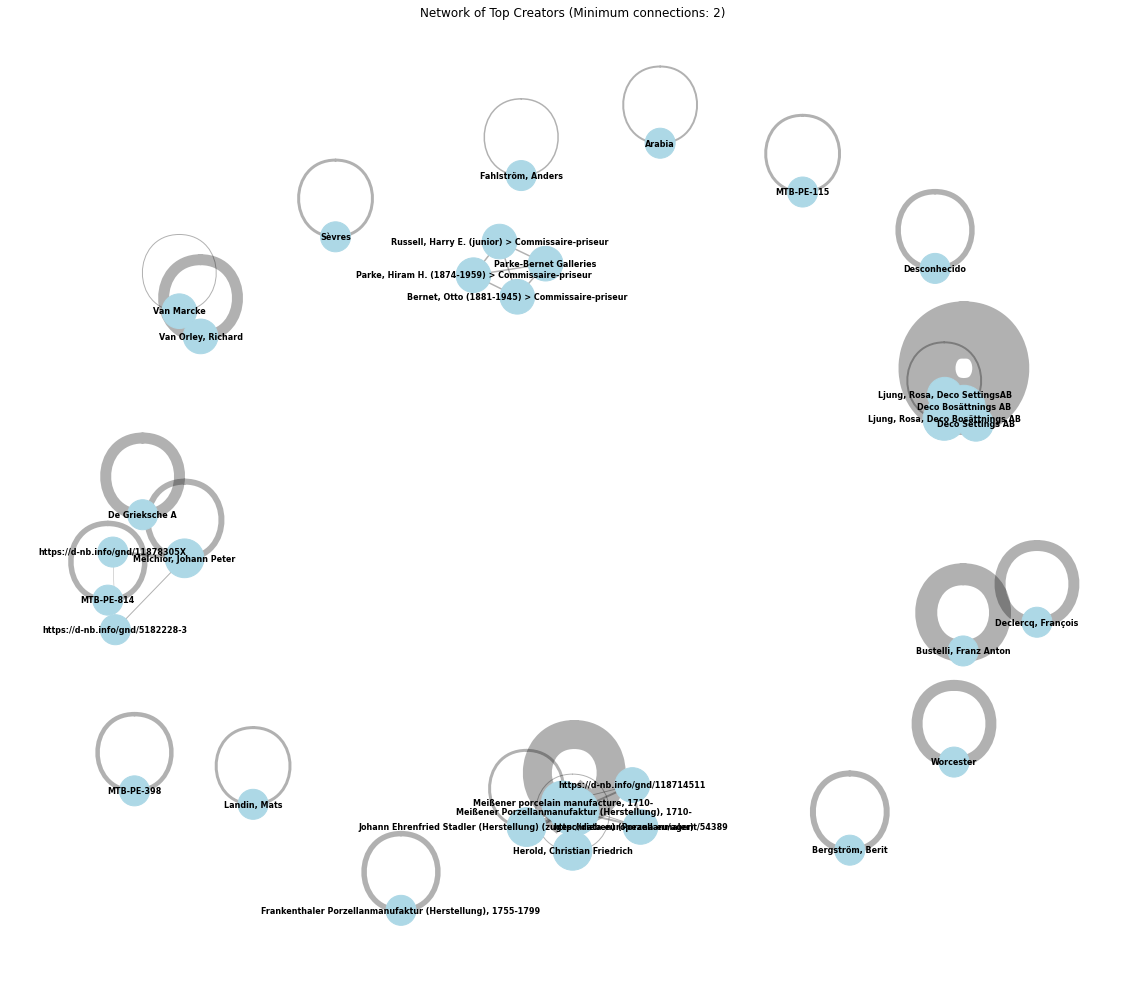

Network Statistics:
Number of nodes: 33
Number of edges: 48
Average degree: 2.91

Top 10 creators by degree centrality:
Meißener Porzellanmanufaktur (Herstellung), 1710-: 0.2188
Meißener porcelain manufacture, 1710-: 0.1562
Deco Bosättnings AB: 0.1562
Ljung, Rosa, Deco Bosättnings AB: 0.1562
Melchior, Johann Peter: 0.1250
Herold, Christian Friedrich: 0.1250
Johann Ehrenfried Stadler (Herstellung) (zugeschrieben) (Porzellanmaler): 0.1250
Deco Settings AB: 0.0938
Ljung, Rosa, Deco SettingsAB: 0.0938
Van Marcke: 0.0938


In [5]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import networkx as nx

# Download required NLTK data
nltk.download('stopwords', quiet=True)

# Fix for language detection randomness
DetectorFactory.seed = 0

# Load your JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

def analyze_data_providers(data):
    data_providers = [provider for item in data if 'dataProvider' in item 
                      for provider in item['dataProvider'] if isinstance(item['dataProvider'], list)]
    provider_counts = Counter(data_providers)
    top_percentage = 0.10
    top_count = int(len(provider_counts) * top_percentage)
    top_providers = provider_counts.most_common(top_count)
    
    providers, counts = zip(*top_providers)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(y=list(providers), x=list(counts), palette='viridis')
    plt.title(f'Top {int(top_percentage * 100)}% of Entries by Data Provider')
    plt.xlabel('Count')
    plt.ylabel('Data Provider')
    plt.show()

def analyze_countries(data):
    countries = [country for item in data if 'country' in item 
                 for country in item['country'] if isinstance(item['country'], list)]
    country_counts = Counter(countries)
    top_n = 10
    top_countries = country_counts.most_common(top_n)
    
    countries_list, counts_list = zip(*top_countries)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(y=list(countries_list), x=list(counts_list), palette='viridis')
    plt.title(f'Top {top_n} Countries by Count')
    plt.xlabel('Count')
    plt.ylabel('Country')
    plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.pie(counts_list, labels=countries_list, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(countries_list)))
    plt.title(f'Percentage Distribution of Top {top_n} Countries')
    plt.show()



# Run the analyses
analyze_data_providers(data)
analyze_countries(data)
analyze_years(data)
analyze_descriptions(data)
analyze_creators_network(data, top_n=50, min_connections=2)

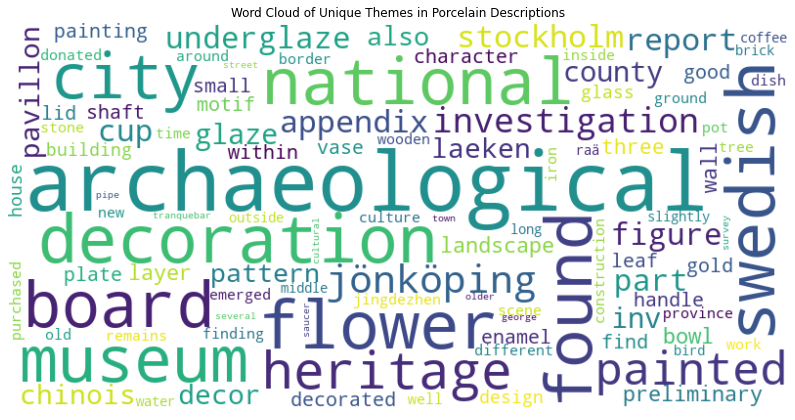

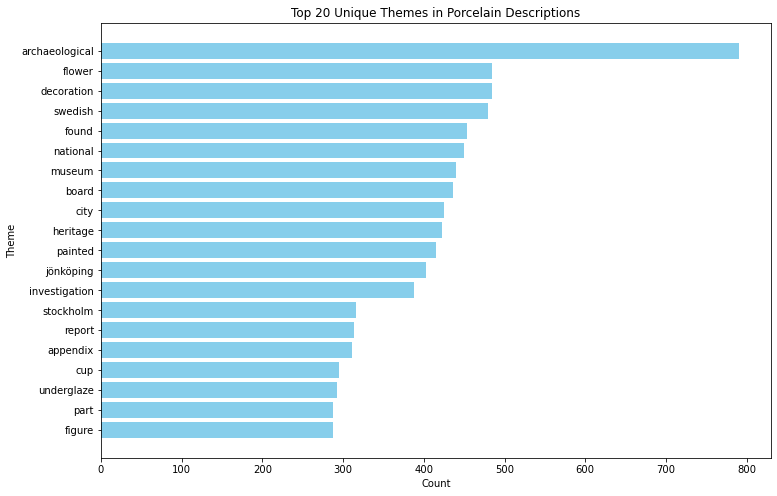

Top 50 unique words and their counts:
archaeological: 790
flower: 484
decoration: 484
swedish: 479
found: 454
national: 450
museum: 440
board: 436
city: 425
heritage: 422
painted: 415
jönköping: 403
investigation: 388
stockholm: 316
report: 313
appendix: 311
cup: 295
underglaze: 292
part: 288
figure: 288
inv: 251
county: 243
glaze: 242
decor: 227
laeken: 223
pavillon: 222
chinois: 222
pattern: 221
also: 219
preliminary: 218
wall: 213
layer: 213
landscape: 211
bowl: 209
three: 199
lid: 188
gold: 185
enamel: 184
decorated: 182
good: 174
small: 169
handle: 167
within: 167
motif: 165
plate: 163
vase: 156
find: 154
painting: 150
shaft: 146
leaf: 145


In [9]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Fix for language detection randomness
DetectorFactory.seed = 0

# Load your JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Define stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['the', 'on', 'to', 'a', 'an', 'and', 'of', 'in', 'for', 'with', 'as', 'by', 'at', 'from', 
                   'that', 'which', 'or', 'but', 'so', 'if', 'when', 'where', 'there', 'it', 'is', 'are', 
                   'was', 'were', 'will', 'would', 'should', 'could', 'has', 'have', 'had', 'been', 'be',
                   'this', 'these', 'those', 'their', 'his', 'her', 'its', 'they', 'them', 'he', 'she',
                   'we', 'us', 'our', 'you', 'your', 'i', 'me', 'my', 'mine', 'yours', 'ours', 'theirs'])

# Define additional terms to exclude
exclude_terms = set([
    # General terms
    'porcelain', 'china', 'chinese', 'ceramic', 'object', 'item', 'piece', 'collection',
    'made', 'century', 'circa', 'probably', 'possibly', 'unknown', 'maker', 'date', 'dated',
    'year', 'period', 'dynasty', 'early', 'late', 'mid', 'th', 'st', 'nd', 'rd',
    
    # Measurements and dimensions
    'cm', 'mm', 'height', 'width', 'length', 'diameter', 'depth', 'size', 'measurement', 'dimensions',
    
    # General descriptors
    'number', 'numbered', 'mark', 'marked', 'unmarked', 'base', 'bottom', 'top', 'side',
    'front', 'back', 'left', 'right', 'center', 'edge', 'rim', 'foot', 'neck', 'body',
    
    # Shape and form
    'shape', 'shaped', 'form', 'formed', 'type', 'style',
    
    # Colors
    'color', 'colored', 'colours', 'coloured', 'tone', 'toned', 'hue', 'shade', 'tint',
    'blue', 'white', 'red', 'green', 'yellow', 'black', 'brown', 'purple', 'pink', 'orange',
    
    # Countries and nationalities
    'chinese', 'english', 'french', 'german', 'dutch', 'japanese', 'korean', 'european', 'asian',
    'china', 'england', 'france', 'germany', 'netherlands', 'japan', 'korea', 'europe', 'asia','swedish'
    
    # Common descriptive terms
    'small', 'large', 'big', 'little', 'tiny', 'huge', 'miniature', 'massive',
    'thin', 'thick', 'wide', 'narrow', 'tall', 'short', 'round', 'square', 'oval', 'circular',
    
    # Time-related terms
    'ancient', 'modern', 'contemporary', 'antique', 'vintage',
    
    # General art terms
    'art', 'artistic', 'craft', 'handmade', 'handcrafted',
    
    # Common verbs
    'use', 'used', 'using', 'make', 'making', 'made', 'create', 'created', 'creating',
    'show', 'showing', 'shown', 'display', 'displaying', 'displayed',
    'depict', 'depicting', 'depicted', 'represent', 'representing', 'represented','dnr','wa','two','ha','one','inv'
    'also'
])

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

def preprocess_text(text):
    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove non-alphabetic tokens and short words
    tokens = [token for token in tokens if token.isalpha() and len(token) > 2]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stop words and excluded terms
    tokens = [token for token in tokens if token not in stop_words and token not in exclude_terms]
    
    return tokens

# Extract and preprocess English descriptions
english_descriptions = []
for item in data:
    if 'dcDescription' in item and isinstance(item['dcDescription'], list):
        for description in item['dcDescription']:
            if is_english(description):
                english_descriptions.extend(preprocess_text(description))

# Count word occurrences
word_counts = Counter(english_descriptions)

# Check if there are any words to display
if not word_counts:
    print("No meaningful words available to generate a word cloud.")
else:
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', 
                          max_words=100, min_font_size=10).generate_from_frequencies(word_counts)
    
    # Display the word cloud
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Unique Themes in Porcelain Descriptions')
    plt.show()
    
    # Bar Chart for Top Words
    top_words = dict(word_counts.most_common(20))
    plt.figure(figsize=(12, 8))
    plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Theme')
    plt.title('Top 20 Unique Themes in Porcelain Descriptions')
    plt.gca().invert_yaxis()
    plt.show()
    
    print("Top 50 unique words and their counts:")
    for word, count in word_counts.most_common(50):
        print(f"{word}: {count}")  

Top 50 unique words and their counts:
wa: 935
archaeological: 790
blue: 704
dnr: 610
flower: 484
decoration: 484
found: 454
national: 450
museum: 440
board: 436
city: 425
heritage: 422
painted: 415
investigation: 388
red: 379
white: 363
form: 360
two: 350
stockholm: 316
report: 313
appendix: 311
ha: 302
cup: 295
underglaze: 292
part: 288
figure: 288
one: 277
county: 243
glaze: 242
green: 223
pavillon: 222
pattern: 221
preliminary: 218
wall: 213
layer: 213
landscape: 211
bowl: 209
edge: 208
three: 199
foot: 197
lid: 188
gold: 185
enamel: 184
decorated: 182
good: 174
used: 173
small: 169
handle: 167
side: 167
motif: 165


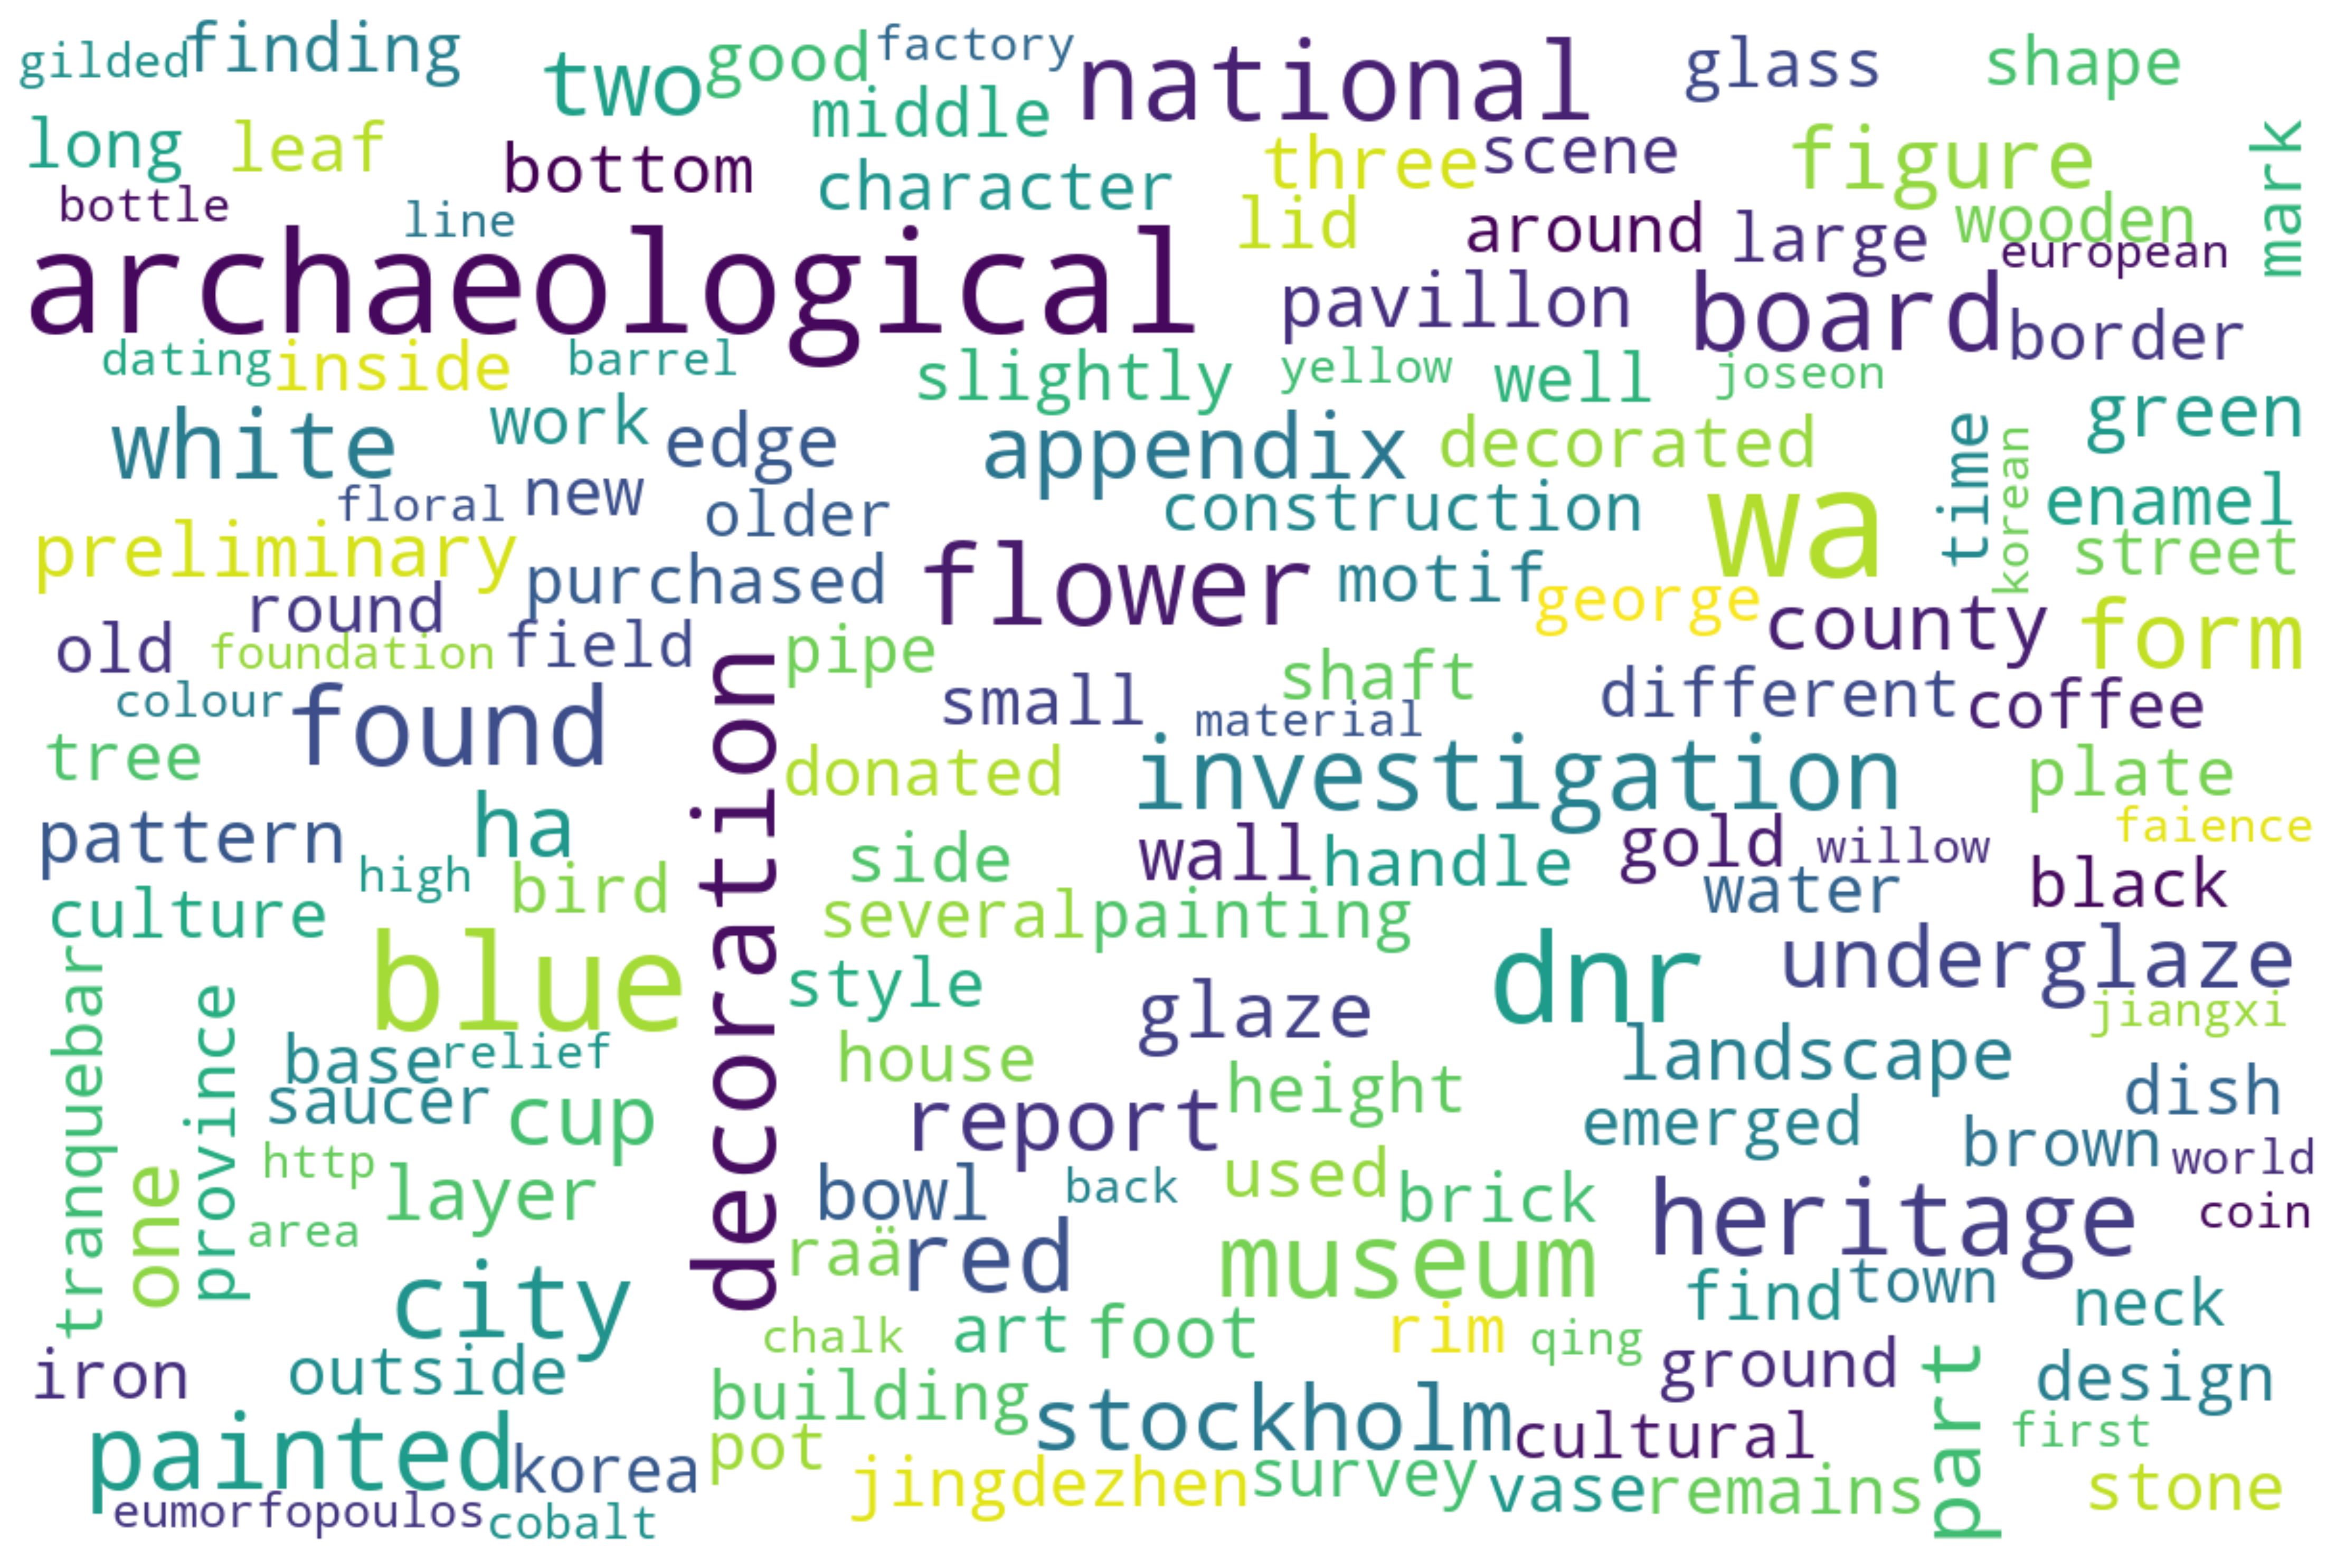

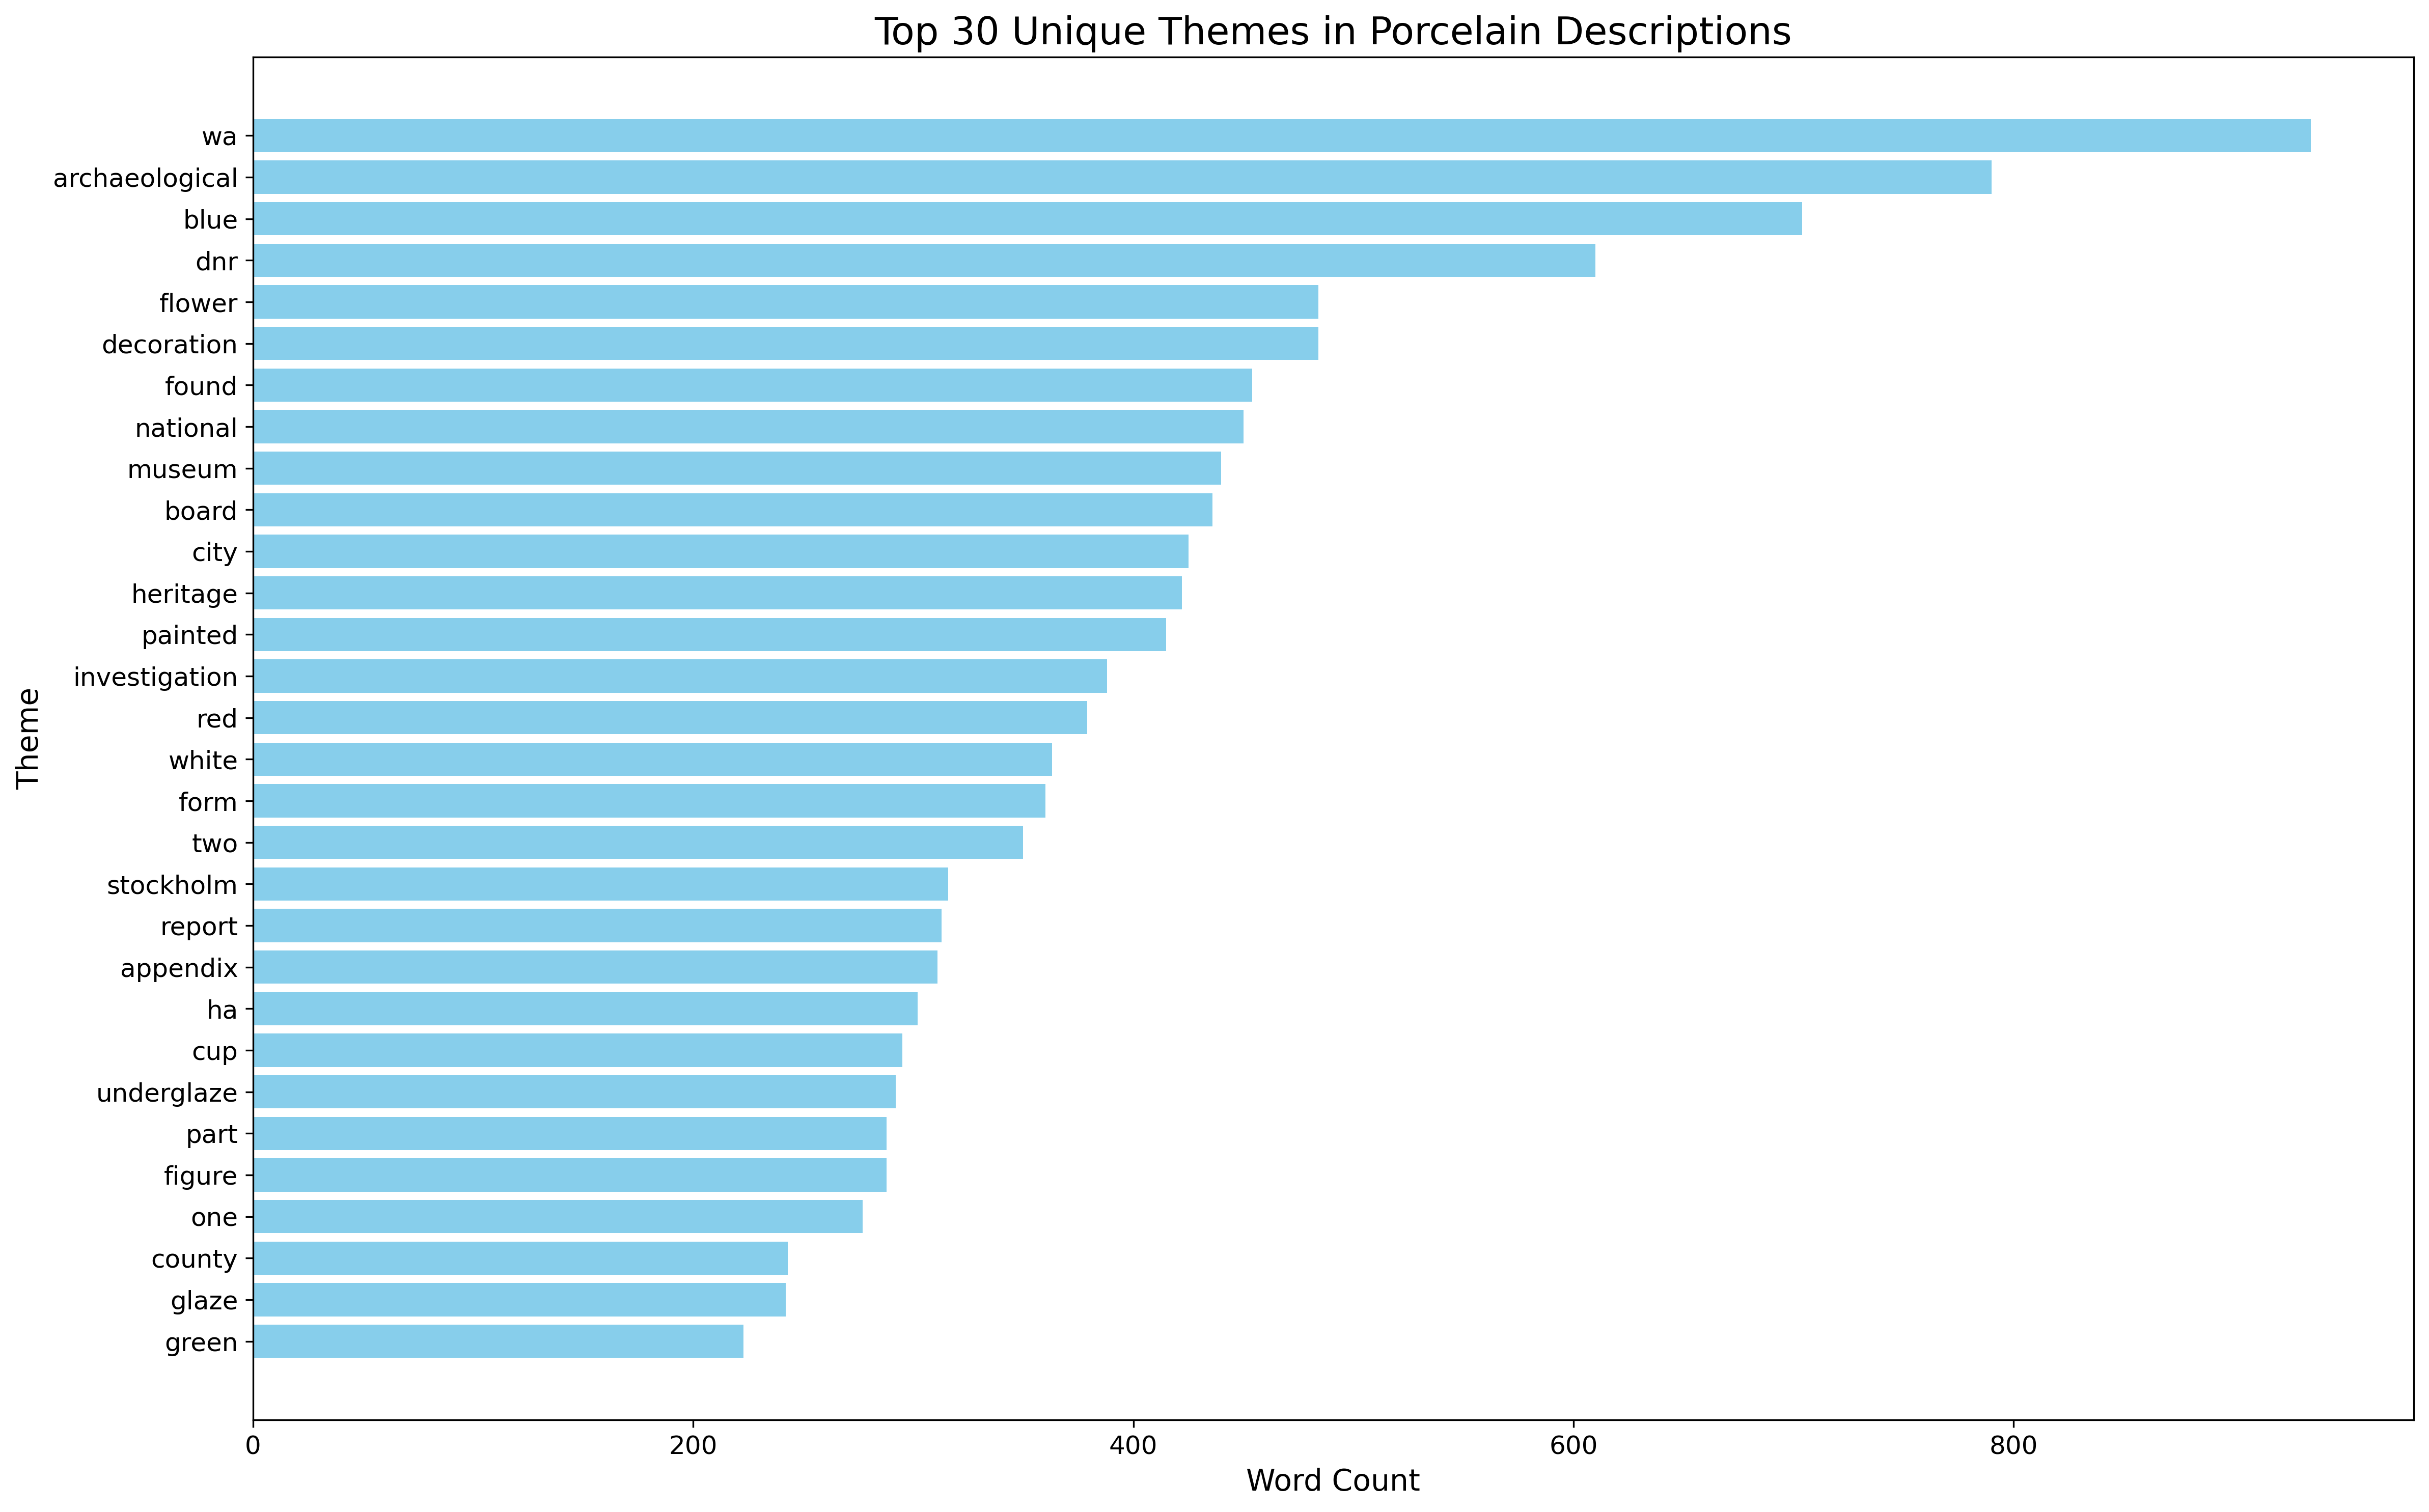

In [2]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Fix for language detection randomness
DetectorFactory.seed = 0

# Load your JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Define stop words and excluded terms
stop_words = set(stopwords.words('english'))
stop_words.update(['the', 'on', 'to', 'a', 'an', 'and', 'of', 'in', 'for', 'with', 'as', 'by', 'at', 'from', 
                   'that', 'which', 'or', 'but', 'so', 'if', 'when', 'where', 'there', 'it', 'is', 'are', 
                   'was', 'were', 'will', 'would', 'should', 'could', 'has', 'have', 'had', 'been', 'be',
                   'this', 'these', 'those', 'their', 'his', 'her', 'its', 'they', 'them', 'he', 'she',
                   'we', 'us', 'our', 'you', 'your', 'i', 'me', 'my', 'mine', 'yours', 'ours', 'theirs'])

exclude_terms = set([
    # General terms
    'porcelain', 'china', 'chinese', 'ceramic', 'object', 'item', 'piece', 'collection',
    'made', 'century', 'circa', 'probably', 'possibly', 'unknown', 'maker', 'date', 'dated',
    'year', 'period', 'dynasty', 'early', 'late', 'mid', 'th', 'st', 'nd', 'rd',
    
    # ... (rest of the excluded terms) ...
    
    # Additional excluded words
    'jönköpin', 'inv', 'also', 'chinois', 'laeken', 'decor', 'within', 'swedish','jönköping'
])

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

def preprocess_text(text):
    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove non-alphabetic tokens and short words
    tokens = [token for token in tokens if token.isalpha() and len(token) > 2]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stop words and excluded terms
    tokens = [token for token in tokens if token not in stop_words and token not in exclude_terms]
    
    return tokens

# Extract and preprocess English descriptions
english_descriptions = []
for item in data:
    if 'dcDescription' in item and isinstance(item['dcDescription'], list):
        for description in item['dcDescription']:
            if is_english(description):
                english_descriptions.extend(preprocess_text(description))

# Count word occurrences
word_counts = Counter(english_descriptions)

# Check if there are any words to display
if not word_counts:
    print("No meaningful words available to generate a word cloud.")
else:
    # Create a word cloud
    wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='viridis', 
                          max_words=150, min_font_size=10, max_font_size=80).generate_from_frequencies(word_counts)
    
    # Save the word cloud image with higher resolution
    plt.figure(figsize=(16, 10), dpi=300)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('wordcloud.png', dpi=300)
    
    # Bar Chart for Top Words
    top_words = dict(word_counts.most_common(30))
    plt.figure(figsize=(16, 10), dpi=300)
    plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
    plt.xlabel('Word Count', fontsize=14)
    plt.ylabel('Theme', fontsize=14)
    plt.title('Top 30 Unique Themes in Porcelain Descriptions', fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    
    # Save the bar chart image with higher resolution
    plt.savefig('top_words_bar_chart.png', dpi=300)
    
    print("Top 50 unique words and their counts:")
    for word, count in word_counts.most_common(50):
        print(f"{word}: {count}")

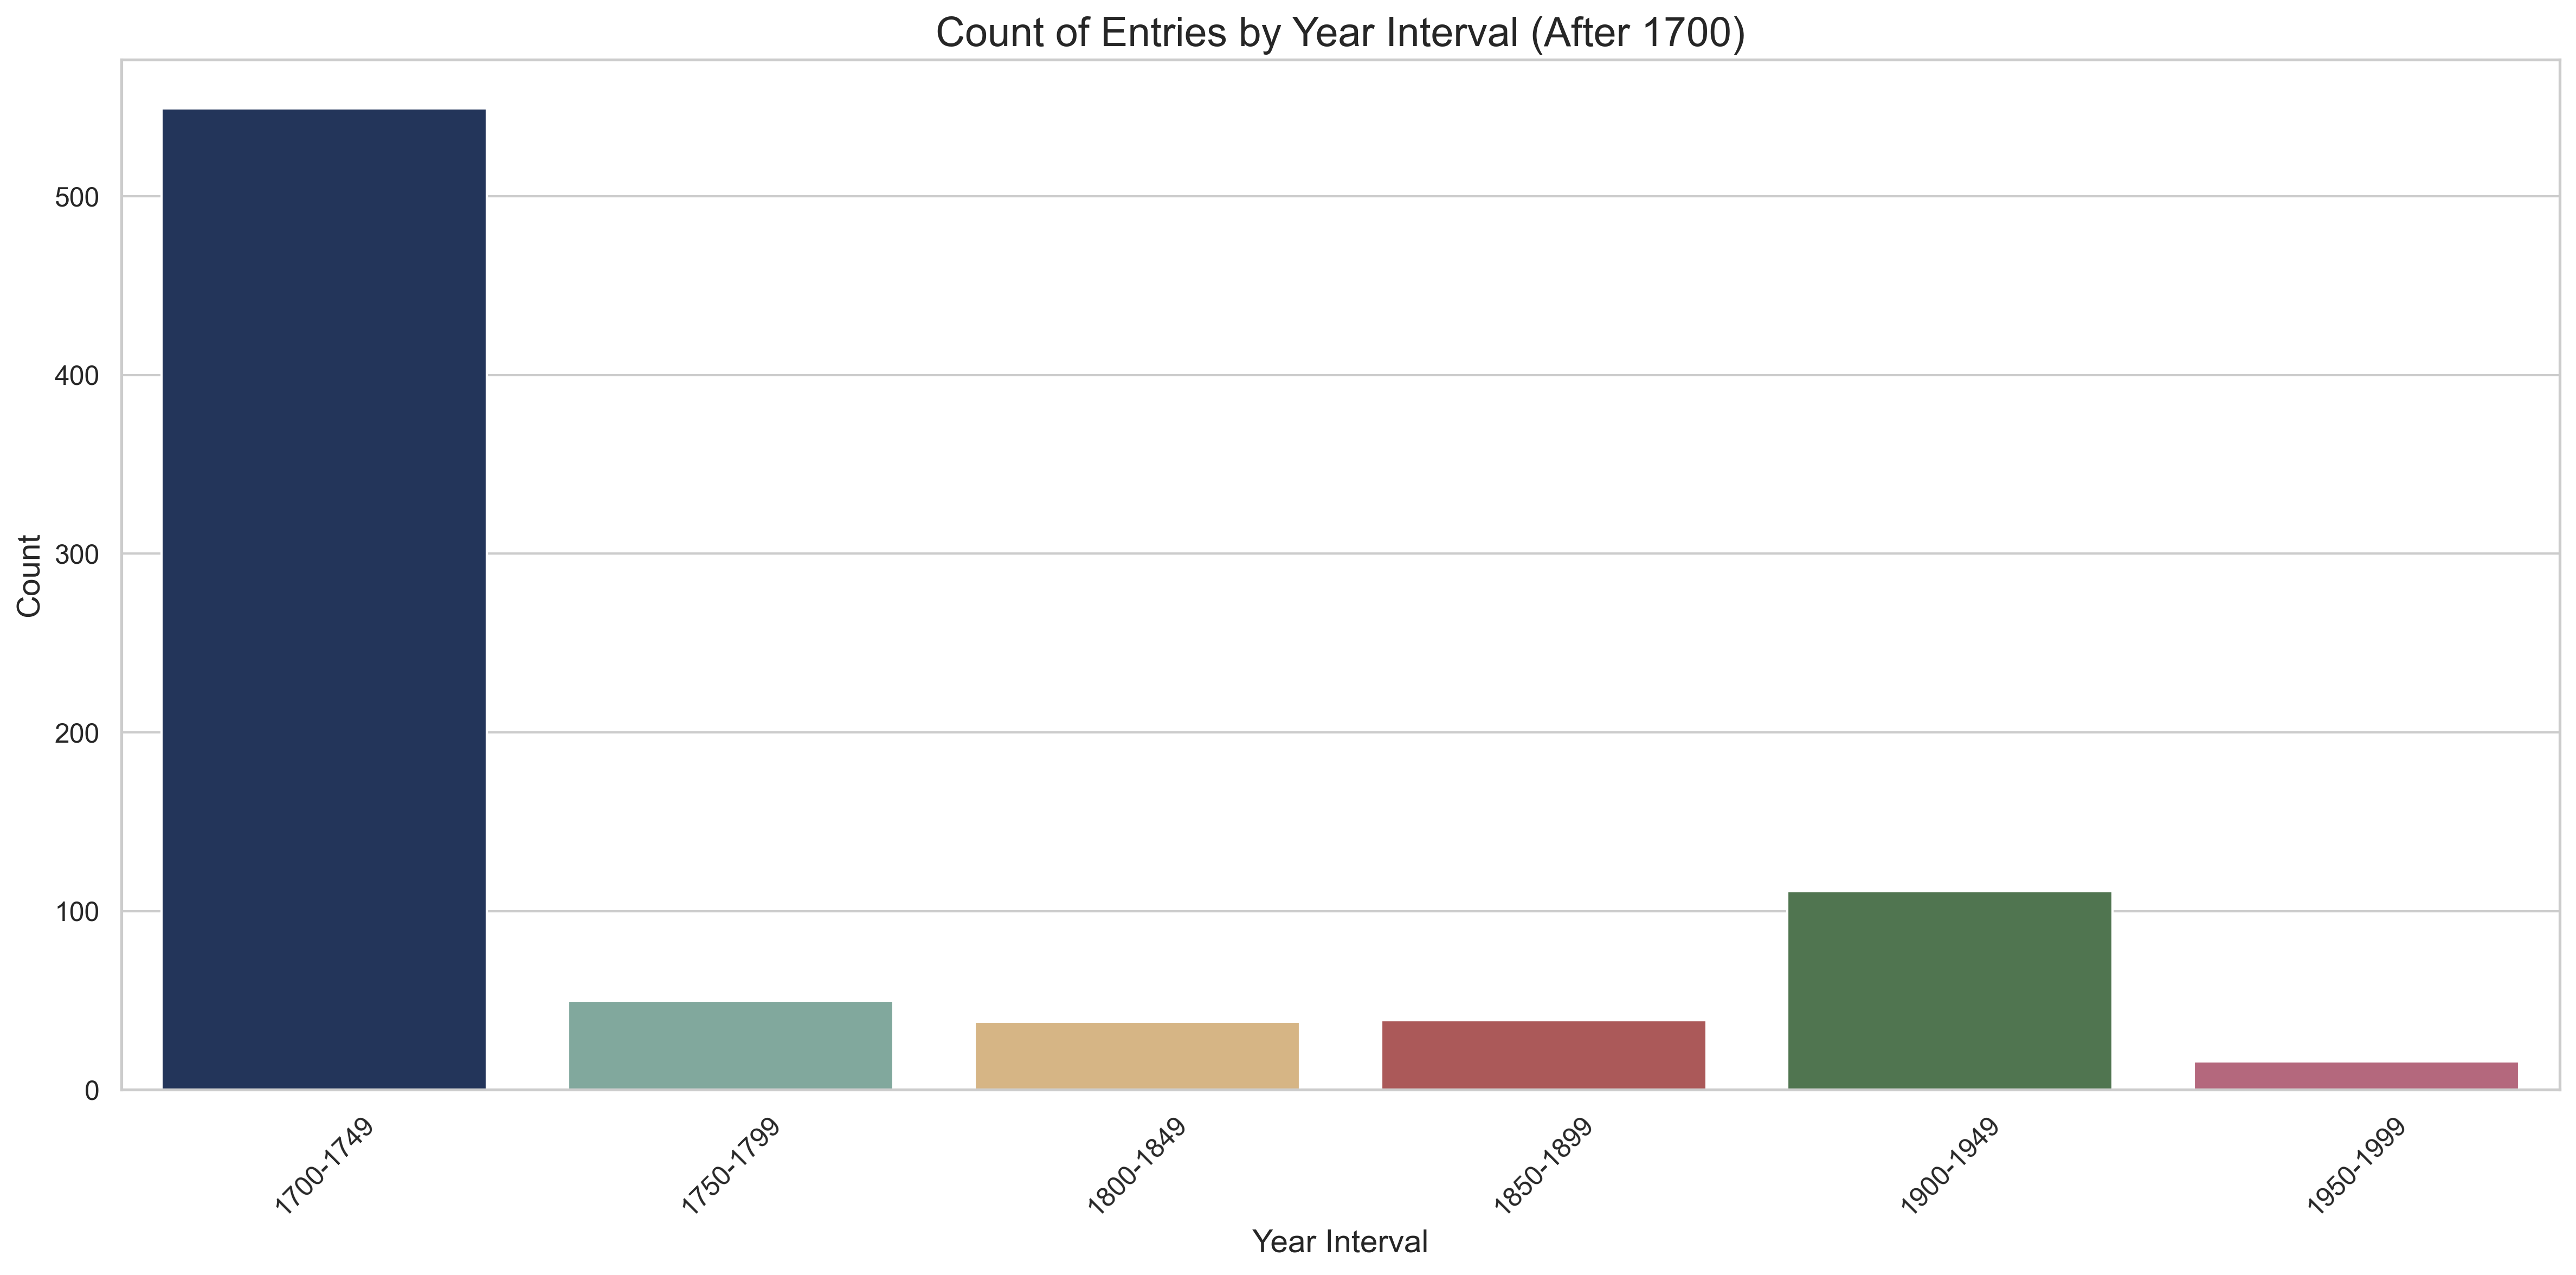

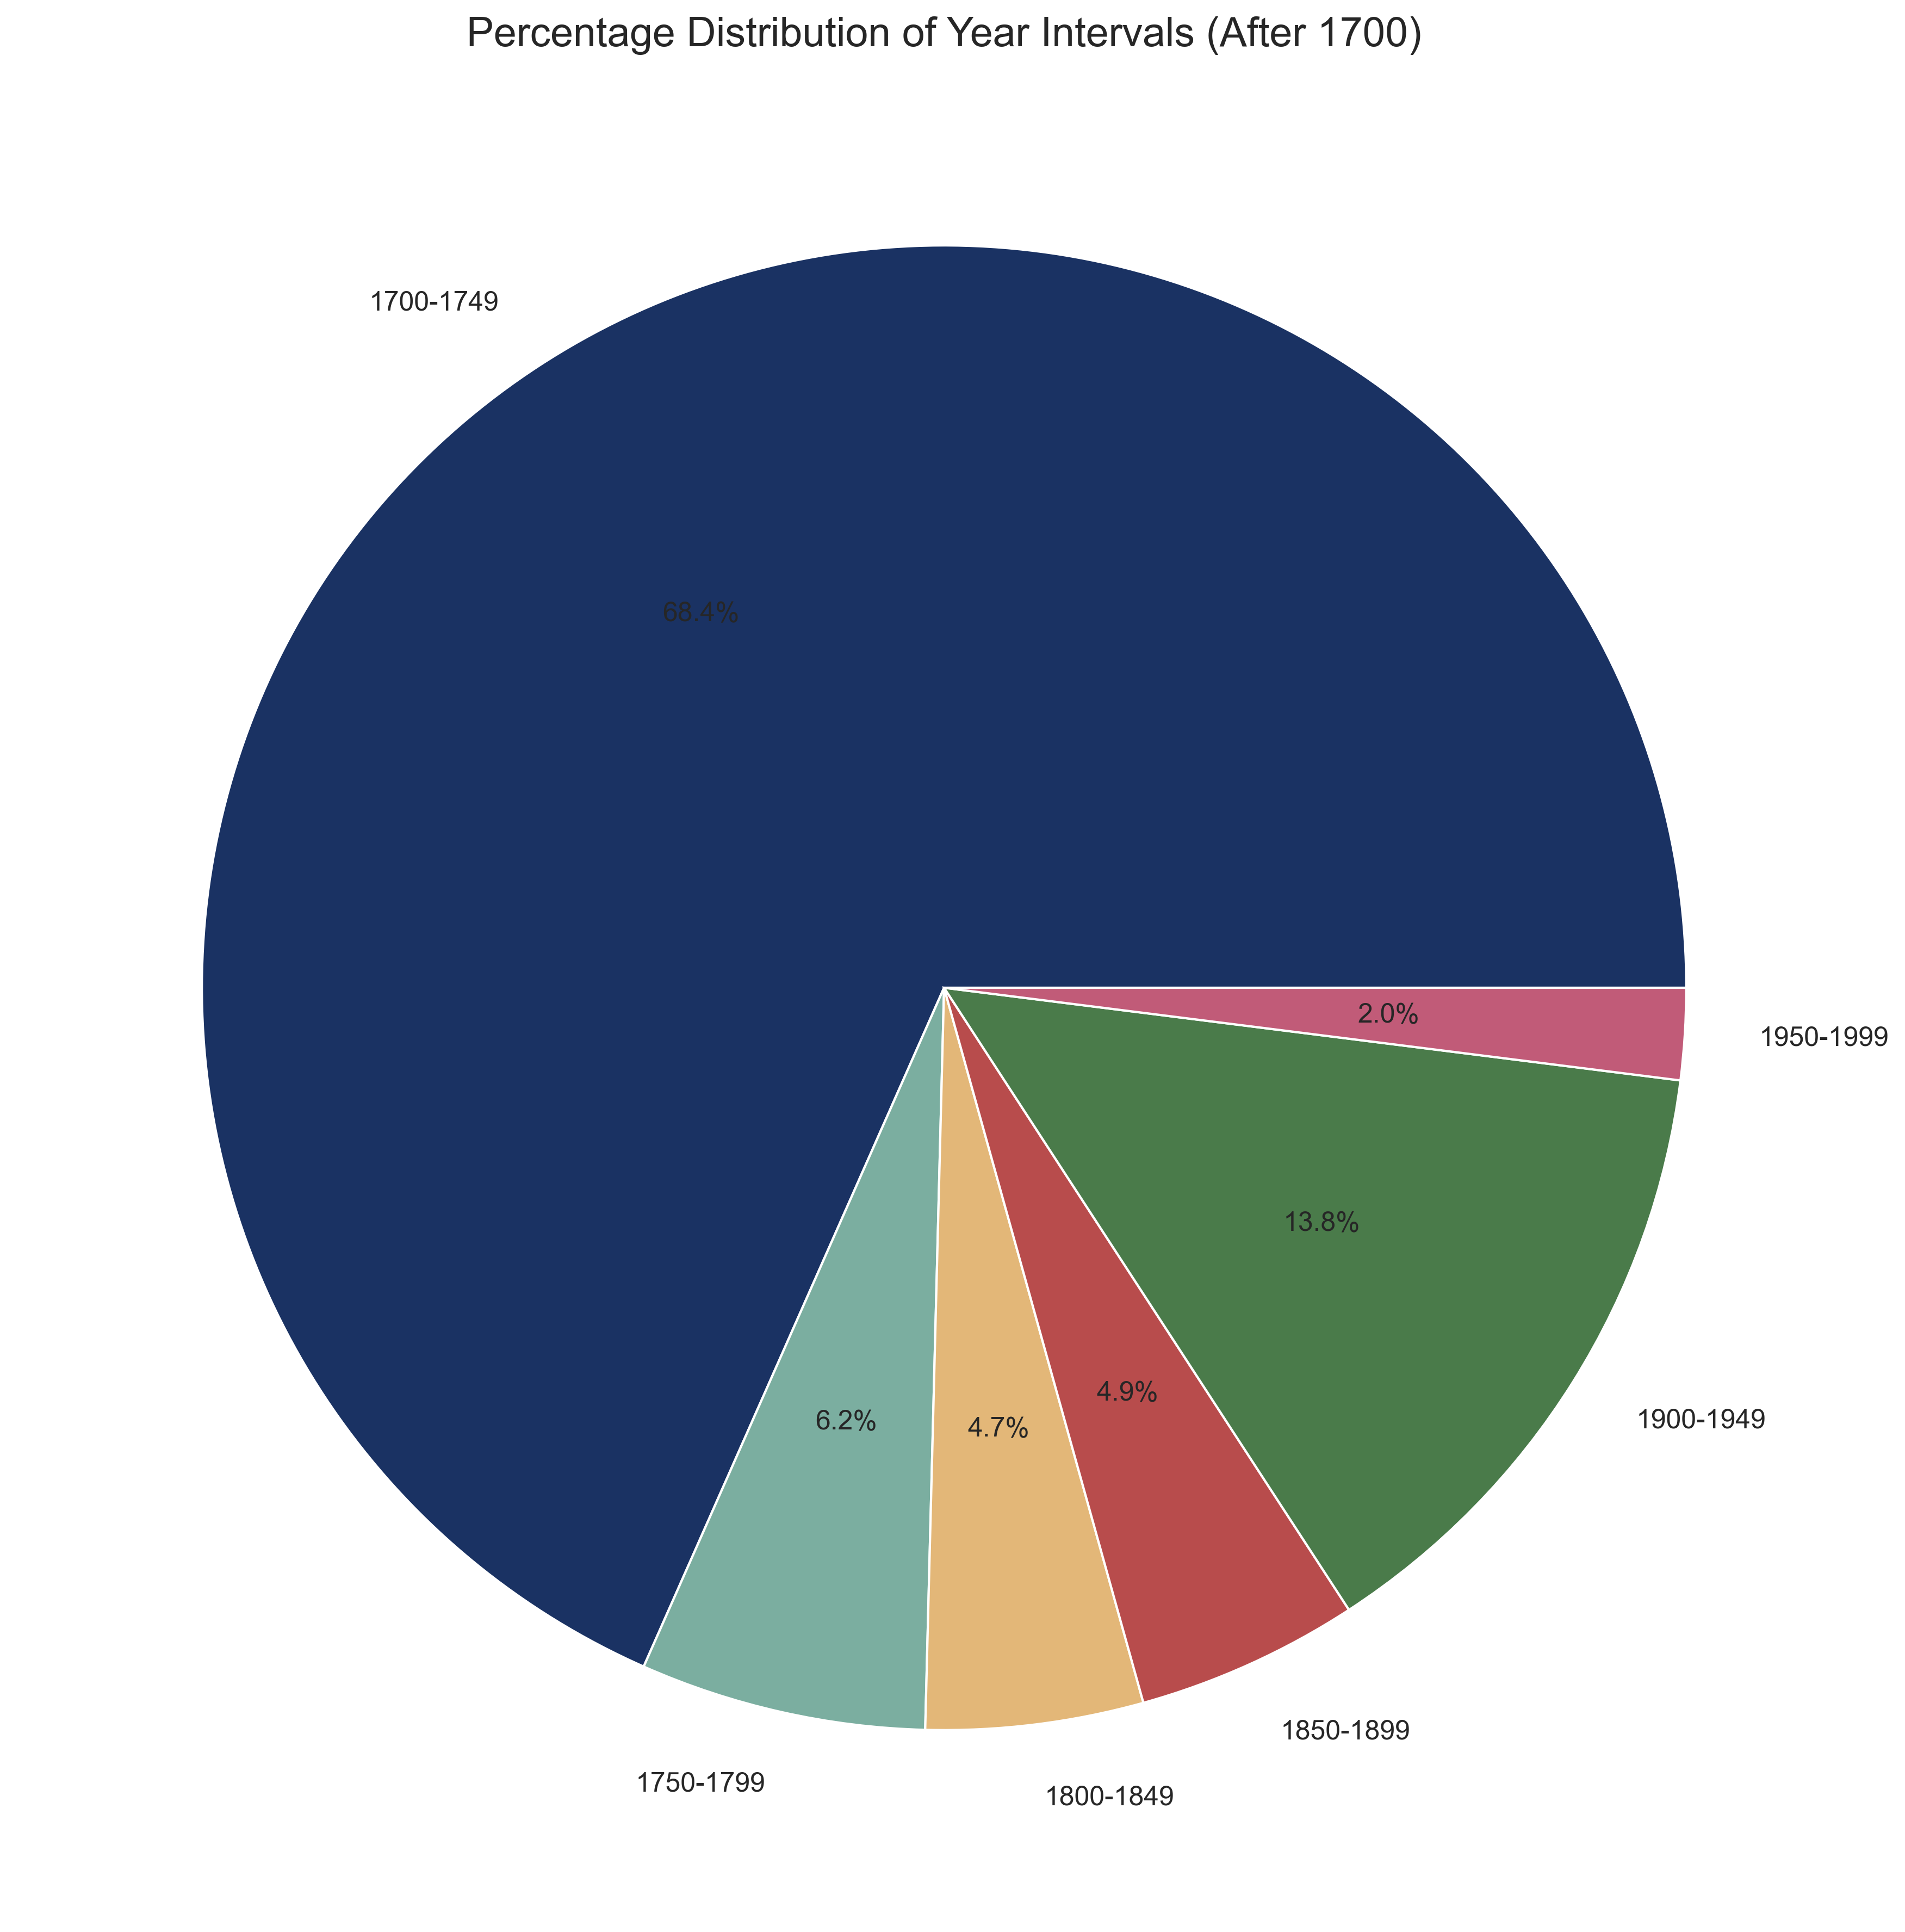

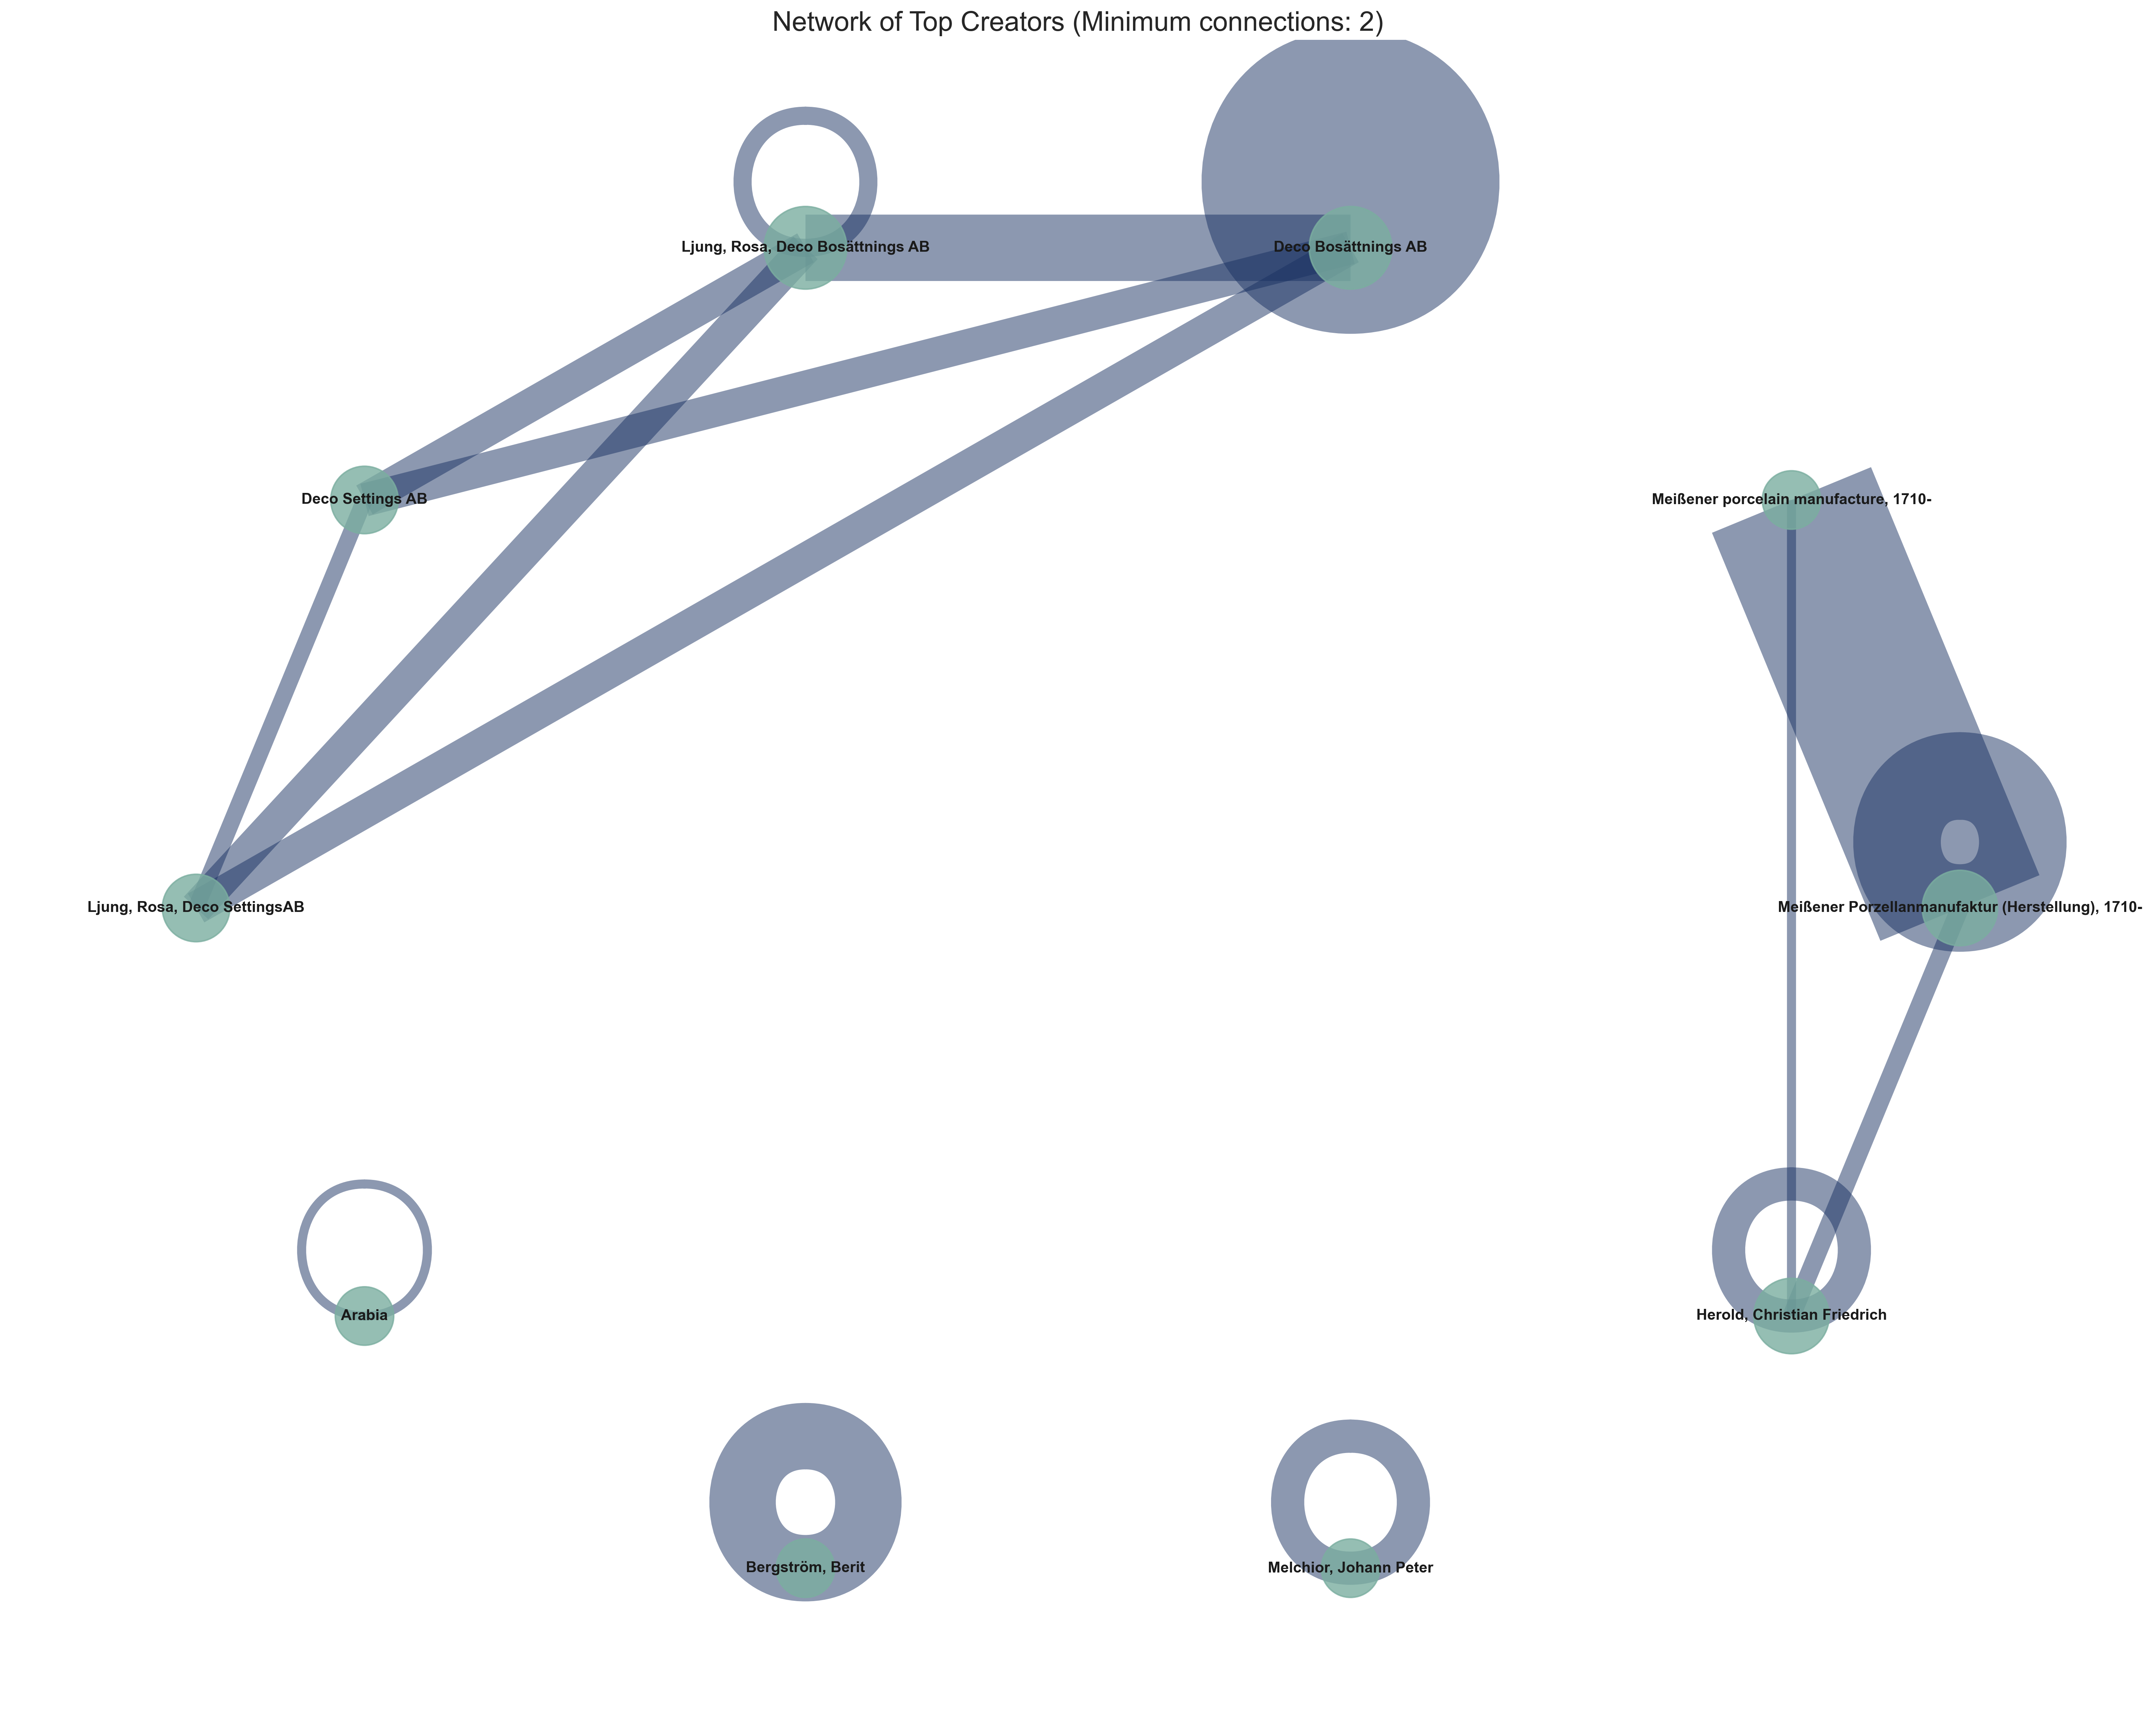

Network Statistics:
Number of nodes: 10
Number of edges: 16
Average degree: 3.20

Top 10 creators by degree centrality:
Deco Bosättnings AB: 0.5556
Ljung, Rosa, Deco Bosättnings AB: 0.5556
Meißener Porzellanmanufaktur (Herstellung), 1710-: 0.4444
Herold, Christian Friedrich: 0.4444
Deco Settings AB: 0.3333
Ljung, Rosa, Deco SettingsAB: 0.3333
Meißener porcelain manufacture, 1710-: 0.2222
Arabia: 0.2222
Bergström, Berit: 0.2222
Melchior, Johann Peter: 0.2222


In [6]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter, defaultdict
import re
import numpy as np

def analyze_years(data):
    years = [int(year) for item in data if 'year' in item 
             for year in (item['year'] if isinstance(item['year'], list) else [item['year']])
             if str(year).isdigit() and int(year) > 1700]
    
    bins = range(1700, 2020, 50)
    labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
    year_bins = np.digitize(years, bins) - 1
    bin_counts = Counter(year_bins)
    
    bin_labels = [labels[i] for i in range(len(labels)) if i in bin_counts]
    bin_values = [bin_counts[i] for i in range(len(labels)) if i in bin_counts]
    
    porcelain_colors = ['#1A3263', '#7BAEA0', '#E3B778', '#B84C4C', '#4A7B4A', '#C15B78']
    
    plt.figure(figsize=(16, 8), dpi=300)
    sns.set(style="whitegrid")
    sns.barplot(x=bin_labels, y=bin_values, palette=porcelain_colors)
    plt.title('Count of Entries by Year Interval (After 1700)', fontsize=18)
    plt.xlabel('Year Interval', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig('year_interval_bar_chart.png', dpi=300)
    plt.show()
    
    plt.figure(figsize=(12, 12), dpi=300)
    plt.pie(bin_values, labels=bin_labels, autopct='%1.1f%%', colors=porcelain_colors, textprops={'fontsize': 12})
    plt.title('Percentage Distribution of Year Intervals (After 1700)', fontsize=18)
    plt.tight_layout()
    plt.savefig('year_interval_pie_chart.png', dpi=300)
    plt.show()


def analyze_creators_network(data, top_n=20, min_connections=2):
    excluded_terms = set(['Unknown', 'Unknown (ceramist)', 'Unknown (ceramic)', 'inconnu', 'inconnu (céramiste)', 
                          'inconnu (céramique)', '未知', '未知 (陶艺家)', '不明', '不明 (陶艺家)', '未知 (陶瓷)', 
                          'Unknown (陶瓷)', 'Unknown (陶艺家)', 'missing', 'manquant', 'absent', 'onbekend', 
                          'onbekend (keramist)', 'Meissen', 'Anoniem', '#Unbekannter_Künstler_Künstler', 
                          'Unbekannter Künstler (Künstler/in)'])
    
    pattern = re.compile('|'.join(re.escape(term) for term in excluded_terms), re.IGNORECASE)
    
    creators = []
    creator_countries = defaultdict(set)
    for item in data:
        if 'dcCreator' in item and isinstance(item['dcCreator'], list):
            for creator in item['dcCreator']:
                if not pattern.search(creator):
                    creators.append(creator)
                    if 'country' in item and isinstance(item['country'], list):
                        creator_countries[creator].update(item['country'])
    
    creator_counts = Counter(creators)
    top_creators = dict(creator_counts.most_common(top_n))
    
    G = nx.Graph()
    
    for creator in top_creators:
        G.add_node(creator, countries=', '.join(creator_countries.get(creator, [])))
    
    for item in data:
        if 'dcCreator' in item and isinstance(item['dcCreator'], list):
            item_creators = [creator for creator in item['dcCreator'] if creator in top_creators]
            if len(item_creators) > 1:
                for i in range(len(item_creators)):
                    for j in range(i + 1, len(item_creators)):
                        if G.has_edge(item_creators[i], item_creators[j]):
                            G[item_creators[i]][item_creators[j]]['weight'] += 1
                        else:
                            G.add_edge(item_creators[i], item_creators[j], weight=1)
    
    # Remove nodes with fewer than min_connections connections
    nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree < min_connections]
    G.remove_nodes_from(nodes_to_remove)
    
    if len(G.nodes()) == 0:
        print("No nodes with sufficient connections found in the network.")
        return
    
    plt.figure(figsize=(20, 16), dpi=300)
    pos = nx.circular_layout(G)
    
    # Calculate node sizes based on degree
    node_sizes = [500 * (1 + G.degree(node)) for node in G.nodes()]
    
    # Calculate edge widths based on weight
    edge_widths = [1.0 * G[u][v]['weight'] for u, v in G.edges()]
    
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='#7BAEA0', alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='#1A3263')
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    plt.title('Network of Top Creators (Minimum connections: {})'.format(min_connections), fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('creators_network.png', dpi=300)
    plt.show()
    
    print("Network Statistics:")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
    
    # Print top 10 creators by degree centrality
    degree_centrality = nx.degree_centrality(G)
    print("\nTop 10 creators by degree centrality:")
    for creator, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{creator}: {centrality:.4f}")


# Load your JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Call the functions with the loaded data
analyze_years(data)
analyze_creators_network(data)